In [35]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [31]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
 # load image from file
 image = Image.open(filename)
 # convert to RGB, if needed
 image = image.convert('RGB')
 # convert to array
 pixels = np.asarray(image)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 # bug fix
 x1, y1 = abs(x1), abs(y1)
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = np.asarray(image)
 return face_array

1/1 [==============================] - 0s 100ms/step
1 (160, 160, 3)
1/1 [==============================] - 0s 102ms/step
2 (160, 160, 3)
1/1 [==============================] - 1s 558ms/step
3 (160, 160, 3)
1/1 [==============================] - 0s 126ms/step
4 (160, 160, 3)
1/1 [==============================] - 0s 93ms/step
5 (160, 160, 3)
1/1 [==============================] - 0s 96ms/step
6 (160, 160, 3)
1/1 [==============================] - 0s 106ms/step
7 (160, 160, 3)
1/1 [==============================] - 0s 93ms/step
8 (160, 160, 3)
1/1 [==============================] - 0s 97ms/step
9 (160, 160, 3)
1/1 [==============================] - 0s 91ms/step
10 (160, 160, 3)
1/1 [==============================] - 0s 102ms/step
11 (160, 160, 3)
1/1 [==============================] - 0s 88ms/step
12 (160, 160, 3)
1/1 [==============================] - 0s 98ms/step
13 (160, 160, 3)
1/1 [==============================] - 0s 90ms/step
14 (160, 160, 3)


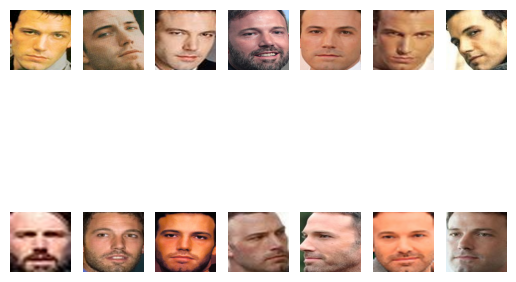

In [36]:
# specify folder to plot
folder = 'test_images/5_celebraties/train/ben_afflek/'
i = 1
# enumerate files
for filename in os.listdir(folder):
    # path
    if('Identifier' in filename):
        continue 
    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    pyplot.subplot(2, 7, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

In [42]:

# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in os.listdir(directory):
        # path
        if('Identifier' in filename):
            continue 
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
        
    return faces

In [40]:

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
 X, y = list(), list()
 # enumerate folders, on per class
 for subdir in os.listdir(directory):
 # path
    path = directory + subdir + '/'
    # skip any files that might be in the dir
    if not os.path.isdir(path):
        continue
  # load all faces in the subdirectory
    faces = load_faces(path)
    # create labels
    labels = [subdir for _ in range(len(faces))]
    # summarize progress
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    # store
    X.extend(faces)
    y.extend(labels)
 return np.asarray(X), np.asarray(y)

In [44]:

# load train dataset
trainX, trainy = load_dataset('test_images/5_celebraties/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('test_images/5_celebraties/val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
np.savez_compressed('5_celebraties.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 110ms/step
>loaded 17 examples for class: elton_john
1/1 [==============================] - 0s 148ms/step
>loaded 22 examples for class: mindy_kaling
1/1 [==============================] - 0s 88ms/step
>loaded 19 examples for class: madonna
1/1 [==============================] - 0s 89ms/step
>loaded 14 examples for class: ben_afflek
1/1 [==============================] - 0s 137ms/step
>loaded 21 examples for class: jerry_seinfeld
(93, 160, 160, 3) (93,)
1/1 [==============================] - 0s 96ms/step
>loaded 5 examples for class: elton_john
1/1 [==============================] - 0s 93ms/step
>loaded 5 examples for class: mindy_kaling
1/1 [==============================] - 0s 118ms/step
>loaded 5 examples for class: madonna
1/1 [==============================] - 0s 85ms/step
>loaded 5 examples for class: ben_afflek
1/1 [==============================] - 0s 107ms/step
>loaded 5 examples for class: jerry_seinfeld
(25, 160, 160, 3) (25,)
